<a href="https://colab.research.google.com/github/chrishunt11/Prediction-of-Loan-Applications/blob/main/Prediction_of_Loan_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Loan Applications
Name: Christopher Hunt

## Project Overview

Link to original dataset from Kaggle:
- [Eligibilty Prediction for Loan](https://www.kaggle.com/datasets/devzohaib/eligibility-prediction-for-loan)

Data Dictionary:
- [Loan Data Dictionary](https://drive.google.com/file/d/19zb-Z80Pt9fRZN7Khs8q3t3m3xrAu6bk/view?usp=sharing)

Objective:
- The objective of this project is to build a model that can correctly predict whether a customer is eligible for a loan or not depending on some variables.

### Load and Inspect the Data

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier


# reading the file using pandas and assigning it to df
fname = '/content/drive/MyDrive/Practice/Loan Prediction/Data/Loan_Data.csv'
df = pd.read_csv(fname, index_col='Loan_ID')
# displaying the first 5 rows
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
# Taking a look at the amount of rows, columns in the dataset
print(f'There are {df.shape[0]} columns and {df.shape[1]} rows in this dataset.')

There are 614 columns and 12 rows in this dataset.


In [3]:
# Looking at the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


### Cleaning the Data

#### Addressing any duplicate rows

In [4]:
# checking for duplicate rows
df.duplicated().sum()

0

There are no duplicate rows in this dataset

#### Addressing any wrong dtypes

In [5]:
# checking dtypes
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Everything looks like it is the correct data type.

#### Identifying any inconsistent/impossible values

In [6]:
# addressing any inconsistent values
cat_cols = df.select_dtypes('object').columns
for col in cat_cols:
  print(f'Value count: {col}')
  print(df[col].value_counts())
  print('\n')

Value count: Gender
Male      489
Female    112
Name: Gender, dtype: int64


Value count: Married
Yes    398
No     213
Name: Married, dtype: int64


Value count: Dependents
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Value count: Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64


Value count: Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64


Value count: Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


Value count: Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64




There does not appear to be any inconsistencies

In [7]:
# Using a for loop to check out the stats for all numerical columns
num_cols = df.select_dtypes('number').columns
for col in num_cols:
  print(f'Stats for: {col}')
  print(df[col].describe())
  print('\n')

Stats for: ApplicantIncome
count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64


Stats for: CoapplicantIncome
count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64


Stats for: LoanAmount
count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


Stats for: Loan_Amount_Term
count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64


Stats for: Credit_History
count    564.000000
mean       0.842199
std   

Everything Looks okay here.

In [8]:
# Checking Loan Amount Term Value Counts
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [9]:
# Checking Dependents Value Counts
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Everything looks good here

In [10]:
# Checking for null values
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We will address these missing values in the preprocessing process

## Exploratory

### Correlation Map

In [11]:
# creating a correlation in the dataframe
corr = df.corr(numeric_only=True)
corr

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.570909,-0.045306,-0.014715
CoapplicantIncome,-0.116605,1.000000,0.188619,-0.059878,-0.002056
LoanAmount,0.570909,0.188619,1.000000,0.039447,-0.008433
Loan_Amount_Term,-0.045306,-0.059878,0.039447,1.000000,0.001470
Credit_History,-0.014715,-0.002056,-0.008433,0.001470,1.000000


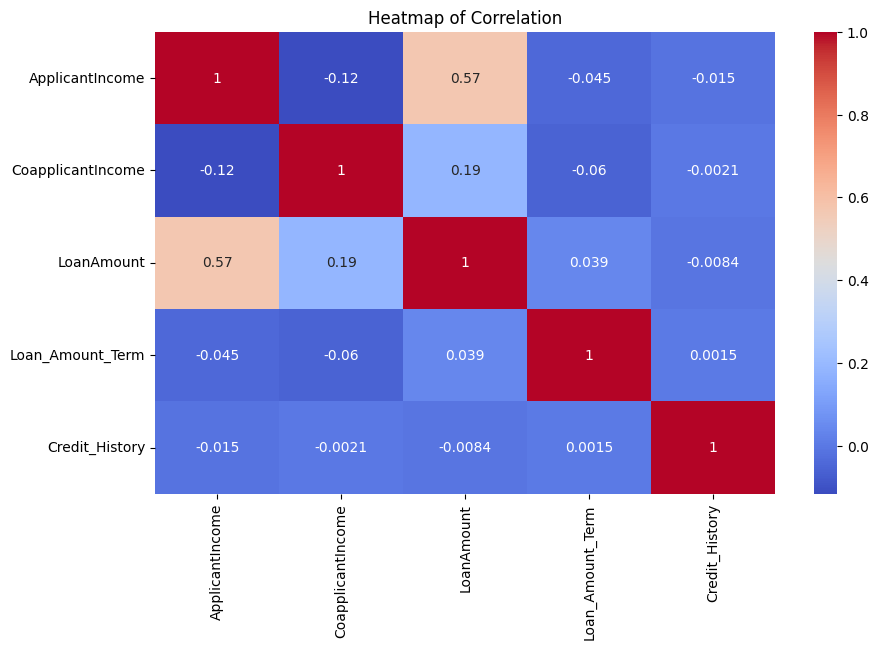

In [12]:
# changing the size of the figure
plt.figure(figsize=(10, 6))

# creating a heatmap
ax = sns.heatmap(corr, cmap='coolwarm', annot=True);
ax.set_title('Heatmap of Correlation');

As we can see from the correlation graph above, there is a moderately strong correlation between Loan Amount and Applicant Income (.57).

### Histogram of Loan Amount

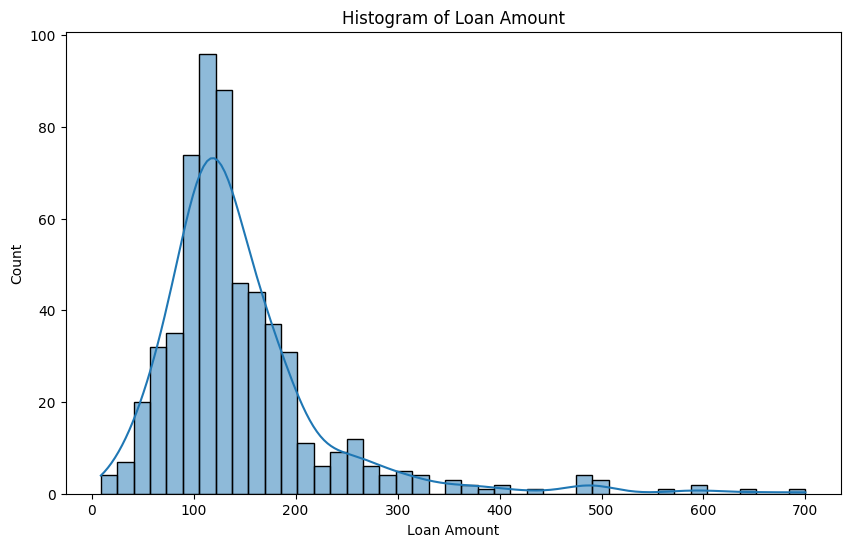

In [13]:
def plot_hist_loan():

  plt.figure(figsize=(10, 6))

  # Creating a histogram of Item Visibility
  ax = sns.histplot(data=df, x='LoanAmount', kde=True)

  # setting the title, xlabel, and ylabel
  ax.set_title('Histogram of Loan Amount');
  ax.set_xlabel('Loan Amount')
  ax.set_ylabel('Count');

plot_hist_loan()

As we can see from the Histogram above, majority of the Loan Amounts are just over $100.

### Countplot of Gender

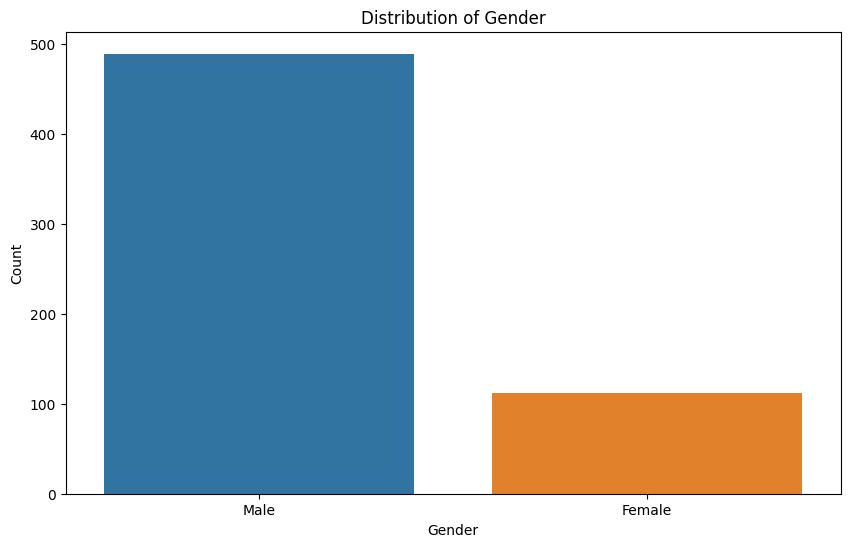

In [14]:
def gender_count():
  # changing the size of the figure
  plt.figure(figsize=(10, 6))

  # creating a countplot of outlet type
  ax = sns.countplot(data=df, x='Gender')

  # creating the xlabel, ylabel, and title
  ax.set_title('Distribution of Gender');
  ax.set_xlabel('Gender')
  ax.set_ylabel('Count');
gender_count()

As we can see from the graph above, majority of the customers requesting for loans are Male.

### Barplot

In [15]:
# Grouping together Gender and Loan Amount
avg_gender_loan_amount = df.groupby('Gender')['LoanAmount'].mean().round(2).sort_values(ascending=False).reset_index()

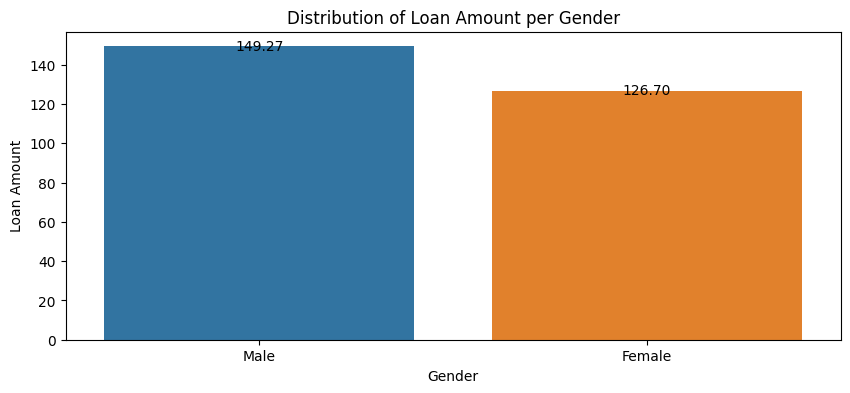

In [16]:
def plot_gender_avg():
  # Creating the figure size
  plt.figure(figsize=(10,4))

  # Creating the barplot using the avg_gender_loan_amount
  ax = sns.barplot(data=avg_gender_loan_amount, x='Gender', y='LoanAmount')

  # Setting the xlabels, ylabels, and title
  ax.set_title('Distribution of Loan Amount per Gender')
  ax.set_xlabel('Gender')
  ax.set_ylabel('Loan Amount');
  for i in ax.patches:
        height = i.get_height()
        ax.text(i.get_x() + i.get_width() / 2., height, f'{height:.2f}', ha='center', va='center', fontsize=10)

plot_gender_avg()

As we can see from the graph above, Male's typically request more money when applying for a Loan.

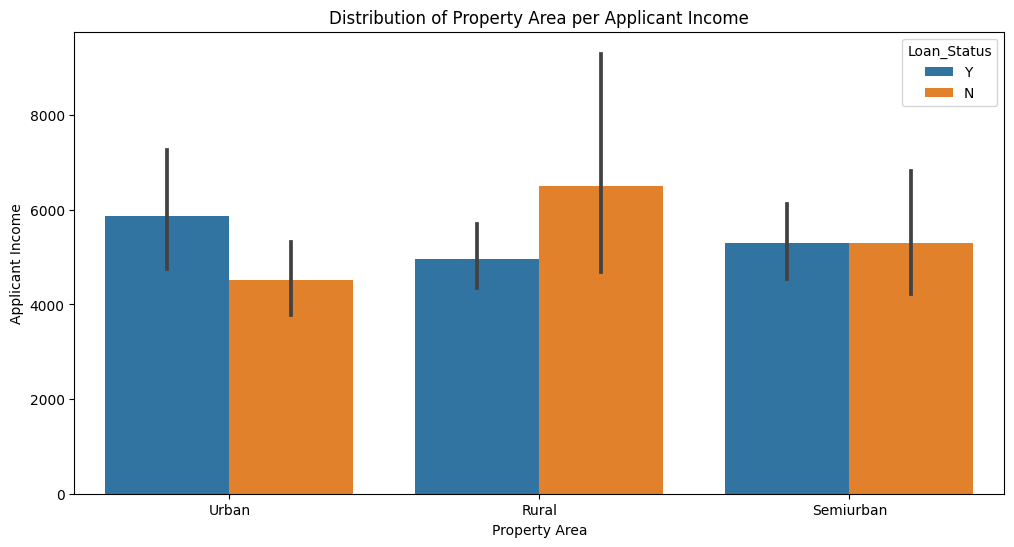

In [17]:
# Changing the size of the figure to make it easier to read
plt.figure(figsize=(12, 6))

# creating a barplot
ax = sns.barplot(data=df, x='Property_Area', y='ApplicantIncome', hue='Loan_Status')

# changing the xlabel, ylabel, title, and rotating the xlabels 90 degrees
ax.set_xlabel('Property Area')
ax.set_ylabel('Applicant Income')
ax.set_title('Distribution of Property Area per Applicant Income')
plt.xticks(rotation=0)
plt.show()

As we can see from the graph above, customers applying for a Loan from the Rural area get denied more often than Urban and Semiurban areas.

## Explanatory Data Analysis

### Custom Functions

#### Univariate

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# exploring categorical
def explore_categorical(df, x, fillna=True, placeholder='MISSING',
                        figsize=(6,4), order=None):

  # making a copy of the dataframe and na
  temp_df = df.copy()

  # before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_percent = null_count/len(temp_df) * 100

  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # create a figure with desired size
  fig, ax = plt.subplots(figsize=figsize)

  # plotting the countplot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)

  # rotating tick labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # adding a title with the feature name included
  ax.set_title(f'Column: {x}', fontweight='bold')

  # fixing layout and showing plot
  fig.tight_layout()
  plt.show()

  # printing null value info
  print(f"- NaN's found: {null_count} ({null_percent:.2f}%)")

  # print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")

  # fing value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)

  # define most common value
  most_common_val = val_counts.index[0]

  # define the frequency of the most common value
  freq = val_counts.values[0]

  # calculate the percentage of the most common value
  percent_most_common = freq / len(temp_df) * 100

  # print the results
  print(f"- Most common Value: '{most_common_val}' occurs {freq} times ({percent_most_common:.2f}%)")

  # print message if quasi-constant or constan (greater than 98% of data)
  if percent_most_common > 98:
    print("\n - [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print('- Not constant or quasi-constant')

  # returning fig, ax
  return fig, ax

# exploring numeric
def explore_numeric(df, x, figsize=(6,5)):

  # making our figure with gridspec for suubplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)

  # histogram on top
  sns.histplot(data=df, x=x, ax=axes[0])

  # boxplot on bottom
  sns.boxplot(data=df, x=x, ax=axes[1])

  # adding a title
  axes[0].set_title(f"Column: {x}", fontweight='bold')

  # adjusting subplots to best fill figure
  fig.tight_layout()

  # ensure plot is shown before message
  plt.show()

  # print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_percent = null_count / len(df) * 100
  print(f"- NaN's found: {null_count} ({null_percent:.2f}%)")

#### Multivariate

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt


# plotting categorical vs target
def plot_categorical_vs_target(df, x, y='SalePrice', figsize=(6,4),
                               fillna=True, placeholder='MISSING',
                               order=None):

# make a temp copy of the dataframe and fillna
  temp_df = df.copy()

# fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
# or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])

# create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

# barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
            linewidth=1, edgecolor='black', errorbar=None)

# boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
              order=order, hue_order=order, legend=False,
              edgecolor='white', linewidth=0.5, size=3,
              zorder=0)

# rotating the x labels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# adding a title
  ax.set_title(f"{x} vs. {y}", fontweight='bold')
  fig.tight_layout()
  return fig, ax

# plotting numeric vs target
def plot_numeric_vs_target(df, x, y='SalePrice', figsize=(6,4)):

  # calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]

  # plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white', 'lw':1, 'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)

  # adding the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})", fontweight='bold')

  # make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

## Transforming Train/Test Data

### Importing Libraries

In [20]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer


# model libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

# classification metrics libraries
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Set global scikit-learn configuration
from sklearn import set_config
# Display estimators as a diagram
set_config(display='diagram') # 'text' or 'diagram'}

### Identifying features and Target

In [21]:
# Target and Features
df['Loan_Status'] = df['Loan_Status'].map({'N':0, 'Y':1})

target = 'Loan_Status'

X = df.drop(columns=[target, 'Loan_Status'])

y = df[target]

In [22]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [23]:
X_train.isna().sum()

Gender               11
Married               1
Dependents           11
Education             0
Self_Employed        20
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           16
Loan_Amount_Term     11
Credit_History       36
Property_Area         0
dtype: int64

### Creating a Numeric Preprocessor

In [24]:
# Saving a list of Column Names
num_cols = X_train.select_dtypes('number').drop(columns=['Loan_Amount_Term', 'Credit_History']).columns
print('Numeric Columns:', num_cols)

# Instantiate Preprocessors
impute_median = SimpleImputer(strategy='median')
scaler = StandardScaler()

# Numeric Preprocessoing Pipeline
num_pipe = make_pipeline(impute_median, scaler)

# Defining Numeric Tuple
num_tuple = ('numeric', num_pipe, num_cols)

Numeric Columns: Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')


### Creating an Ordinal Preprocessor

In [25]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [26]:
# Creating a list of column names
ord_cols = ['Loan_Amount_Term', 'Dependents', 'Credit_History']
print('Ordinal Columns:', ord_cols)

# Create Imputer
impute_na_ord = SimpleImputer(strategy='constant', fill_value='NA')

### Making OrdinalEncoder
# Specifying thr order of the categories
loan_term = ['NA', 12, 36, 60, 84, 120, 180, 240, 300, 360, 480]
dependents = ['NA', '0', '1', '2', '3+']
history = ['NA', 0.0, 1.0]

# Making the list of order lists for OrdinalEncoder
ordinal_category_order = [loan_term, dependents, history]
ord_encoder = OrdinalEncoder(categories=ordinal_category_order)

# Making a final Scaler
scaler_ord = StandardScaler()

# Making ord_pipe
ord_pipe = make_pipeline(impute_na_ord, ord_encoder, scaler_ord)

# Making an Ordinal tuple
ord_tuple = ('ordinal', ord_pipe, ord_cols)
ord_tuple

Ordinal Columns: ['Loan_Amount_Term', 'Dependents', 'Credit_History']


('ordinal',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['NA', 12, 36, 60, 84, 120, 180,
                                              240, 300, 360, 480],
                                             ['NA', '0', '1', '2', '3+'],
                                             ['NA', 0.0, 1.0]])),
                 ('standardscaler', StandardScaler())]),
 ['Loan_Amount_Term', 'Dependents', 'Credit_History'])

### Creating a Categorical Preprocessor

In [27]:
# Preprocessing Pipeline for One Hot Encoded Data
ohe_cols = X_train.select_dtypes('object').drop(columns='Dependents').columns
ohe_cols

# Instantiate the individual preprocessors
impute_na = SimpleImputer(strategy='constant', fill_value='NA')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Make pipeline with impute and encoder
ohe_pipe = make_pipeline(impute_na, ohe_encoder)

# Making a One Hot Encoded tuple
ohe_tuple = ('categorical', ohe_pipe, ohe_cols)
ohe_cols

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object')

### Column Transformer

In [28]:
preprocessor = ColumnTransformer([num_tuple, ord_tuple, ohe_tuple],
                                 verbose_feature_names_out=False)

preprocessor

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncod...
                                 ['Loan_Amount_Term', 'Dependents',
                                  'Credit_History']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object'))],
                  verbose_feature_names_out=False)

In [29]:
preprocessor.fit(X_train)

ColumnTransformer(transformers=[('numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                ('ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('ordinalencoder',
                                                  OrdinalEncod...
                                 ['Loan_Amount_Term', 'Dependents',
                                  'Credit_History']),
                                ('categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object'))],
                  verbose_feature_names_out=False)

#### Custom Function

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay
def classification_metrics(y_true, y_pred, label='',
                           output_dict=False, figsize=(8,4),
                           normalize='true', cmap='Blues',
                           colorbar=False):

  # Get the classification report
  report = classification_report(y_true, y_pred)

  ## Print header and report
  header = "-"*70
  print(header, f" Classification Metrics: {label}", header, sep='\n')
  print(report)

  ## CONFUSION MATRICES SUBPLOT
  fig, axes = plt.subplots(ncols=2, figsize=figsize)

  # create a confusion matrix  of raw counts
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=None, cmap='gist_gray',colorbar=colorbar,
                ax = axes[0],);
  axes[0].set_title("Raw Counts")

  # create a confusion matrix with the test data
  ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                normalize=normalize, cmap=cmap,colorbar=colorbar,
                ax = axes[1]);
  axes[1].set_title("Normalized Confusion Matrix")
  fig.tight_layout()
  plt.show()

  if output_dict==True:
    report_dict = classification_report(y_true, y_pred, output_dict=True)
    return report_dict

def evaluate_classification(model, X_train, y_train, X_test, y_test,
                         figsize=(6,4), normalize='true', output_dict = False,
                            cmap_train='Blues', cmap_test="Reds",colorbar=False):

  # Get predictions for training data
  y_train_pred = model.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = classification_metrics(y_train, y_train_pred, #verbose = verbose,
                                     output_dict=True, figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_train,
                                     label='Training Data')
  print()

  # Get predictions for test data
  y_test_pred = model.predict(X_test)

  # Call the helper function to obtain regression metrics for test data
  results_test = classification_metrics(y_test, y_test_pred, #verbose = verbose,
                                  output_dict=True,figsize=figsize,
                                         colorbar=colorbar, cmap=cmap_test,
                                    label='Test Data' )

  if output_dict == True:
    # Store results in a dataframe if ouput_frame is True
    results_dict = {'train':results_train,
                    'test': results_test}
    return results_dict

## Models

### KNeighbor Classifier

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# instantiate default KNN
knn = KNeighborsClassifier()

# define KNN model pipeline
knn_pipe = make_pipeline(preprocessor, knn)

# fit the model on the training data
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='const...
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('kneighborsclassifier', KNeighborsClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.49      0.61       138
           1       0.81      0.95      0.88       322

    accuracy                           0.81       460
   macro avg       0.81      0.72      0.74       460
weighted avg       0.81      0.81      0.80       460



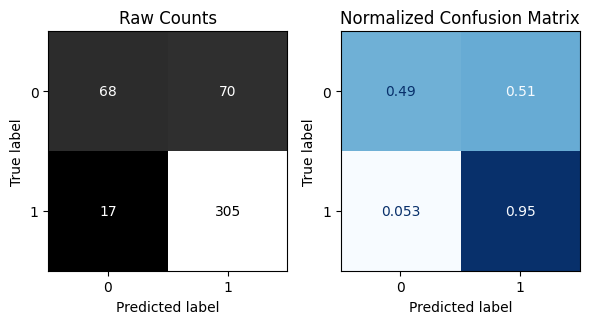


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.75      0.39      0.51        54
           1       0.74      0.93      0.82       100

    accuracy                           0.74       154
   macro avg       0.74      0.66      0.67       154
weighted avg       0.74      0.74      0.71       154



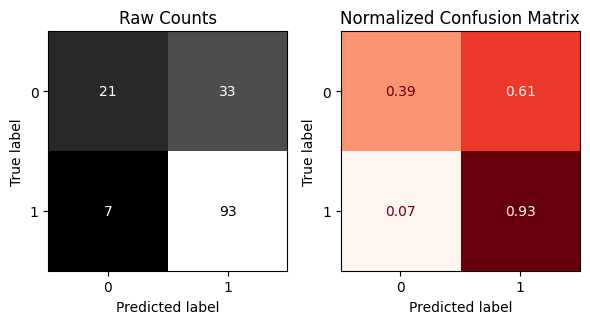

In [32]:
# obtain evaluation metrics using custom functions
evaluate_classification(knn_pipe, X_train, y_train, X_test, y_test)

#### Tuning

In [33]:
# making every other value from the range (odd values)
nneighbors_list = list(range(1, 51, 2))

# create a param grid
params = {'kneighborsclassifier__n_neighbors': nneighbors_list,
          'kneighborsclassifier__weights': ['distance','uniform']}

# instantiate gridsearch
knn_gs = GridSearchCV(knn_pipe, params, verbose=5, n_jobs=-1,
                  scoring='recall_macro')

# fit gs on training data
knn_gs.fit(X_train, y_train)

# creating value for best estimator
knn_best_est = knn_gs.best_estimator_

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [34]:
# getting best params
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 1,
 'kneighborsclassifier__weights': 'distance'}

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       322

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460



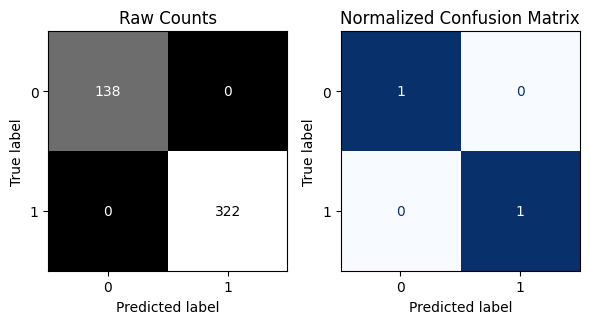


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.46      0.52        54
           1       0.74      0.83      0.78       100

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.65       154
weighted avg       0.69      0.70      0.69       154



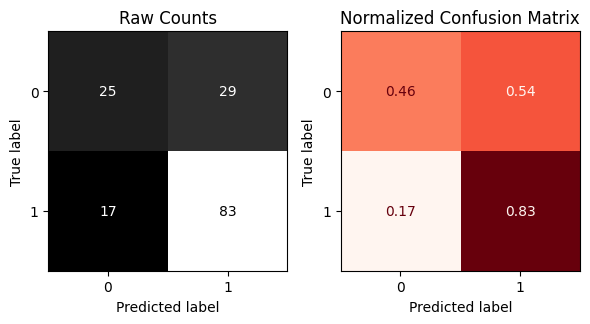

In [35]:
# obtain complete evaluation for best performing model
evaluate_classification(knn_best_est, X_train, y_train, X_test, y_test)

### Decision Tree Classifier

In [36]:
dt = DecisionTreeClassifier()

dt_pipe = make_pipeline(preprocessor, dt)

dt_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='const...
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       138
           1       1.00      1.00      1.00       322

    accuracy                           1.00       460
   macro avg       1.00      1.00      1.00       460
weighted avg       1.00      1.00      1.00       460



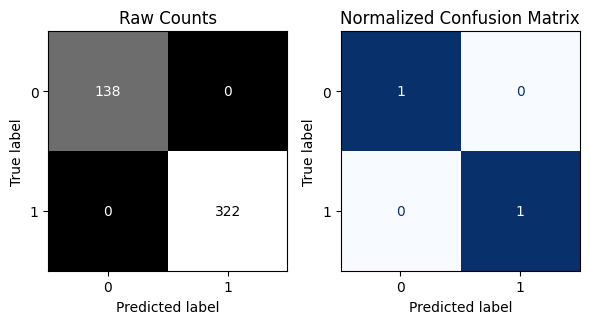


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.41      0.46        54
           1       0.71      0.80      0.75       100

    accuracy                           0.66       154
   macro avg       0.62      0.60      0.61       154
weighted avg       0.65      0.66      0.65       154



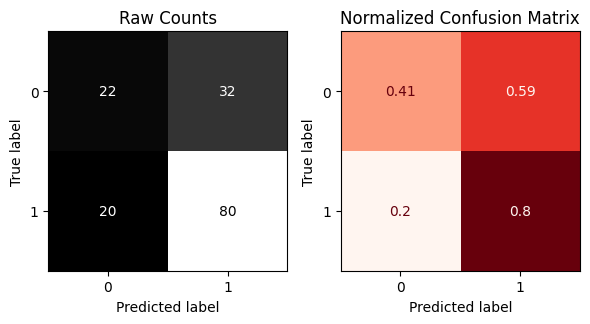

In [37]:
evaluate_classification(dt_pipe, X_train, y_train, X_test, y_test)

#### Tuning

In [38]:
# Define the hyperparameter grid for the DecisionTreeClassifier
param_grid = {
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15, 20],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(dt_pipe, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.89      0.54      0.68       138
           1       0.83      0.97      0.90       322

    accuracy                           0.84       460
   macro avg       0.86      0.76      0.79       460
weighted avg       0.85      0.84      0.83       460



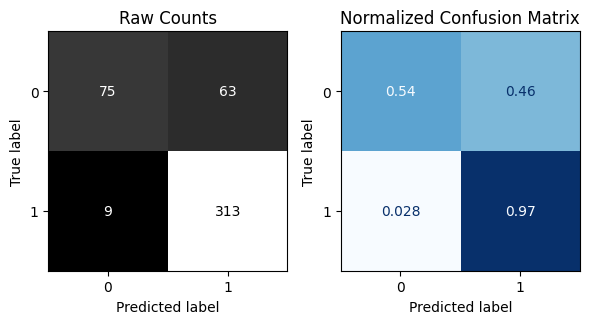


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.70      0.35      0.47        54
           1       0.72      0.92      0.81       100

    accuracy                           0.72       154
   macro avg       0.71      0.64      0.64       154
weighted avg       0.72      0.72      0.69       154



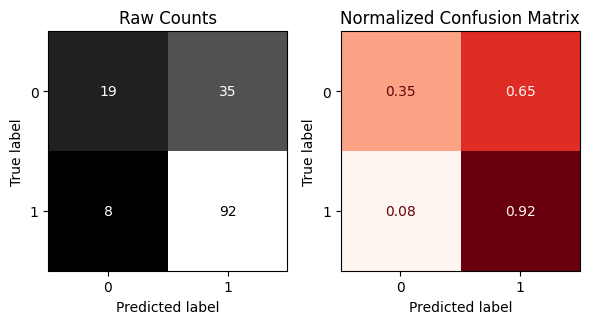

In [39]:
evaluate_classification(best_model, X_train, y_train, X_test, y_test)

### Logistic Regression

In [40]:
# creating a logistic regression model
lr = LogisticRegression(random_state=42)

# creating the pipe
lr_pipe = make_pipeline(preprocessor, lr)

# fitting the pipe onto the training data
lr_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='const...
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('logisticregression', LogisticRegression(random_state=42))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.20      0.28       138
           1       0.73      0.92      0.81       322

    accuracy                           0.70       460
   macro avg       0.62      0.56      0.55       460
weighted avg       0.66      0.70      0.65       460



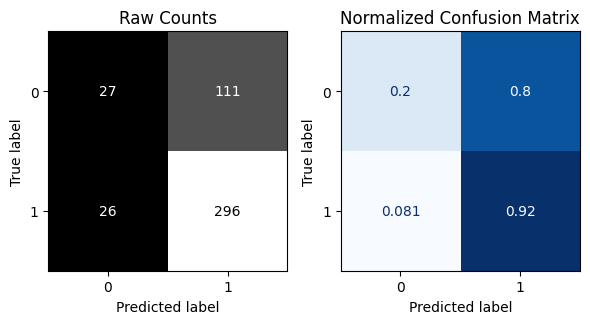


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.19      0.29        54
           1       0.68      0.95      0.79       100

    accuracy                           0.68       154
   macro avg       0.68      0.57      0.54       154
weighted avg       0.68      0.68      0.62       154



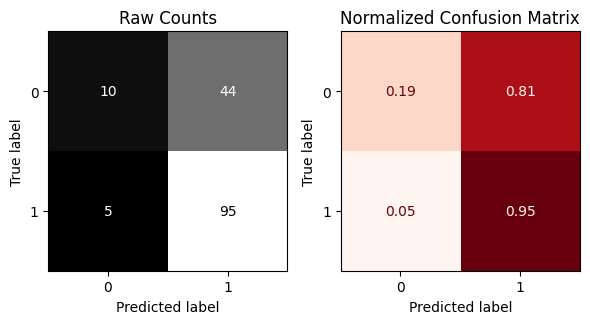

In [41]:
evaluate_classification(lr_pipe, X_train, y_train, X_test, y_test)

#### Tuning

In [42]:
# Create a dictionary of parameters
params = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [43]:
# Tune hyperparameters with GridSearchCV
lr_gs = GridSearchCV(lr_pipe, params)
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                                                        ('ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(fill_val...
                                                                                                        strategy='constant')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42))]),
             param_grid={'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100,
                                                   1000]})

In [44]:
# setting best estimators to best_lr
best_lr = lr_gs.best_estimator_

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       138
           1       0.70      1.00      0.82       322

    accuracy                           0.70       460
   macro avg       0.35      0.50      0.41       460
weighted avg       0.49      0.70      0.58       460



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


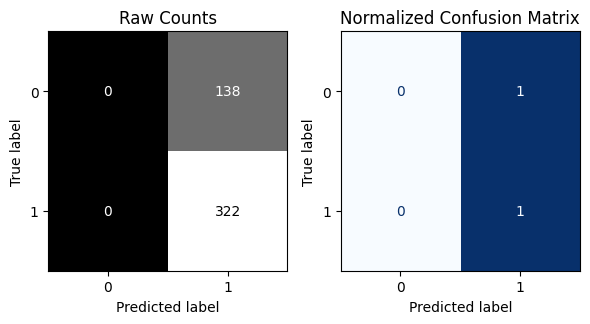

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.65      1.00      0.79       100

    accuracy                           0.65       154
   macro avg       0.32      0.50      0.39       154
weighted avg       0.42      0.65      0.51       154



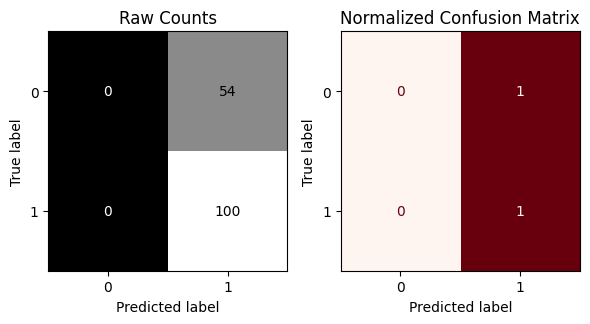

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [45]:
# evaluating the model
evaluate_classification(best_lr, X_train, y_train, X_test, y_test)

### LightGMB

In [46]:
lgbm = LGBMClassifier()

lgbm_pipe = make_pipeline(preprocessor, lgbm)

lgbm_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='const...
                                                   'Credit_History']),
                                                 ('categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('lgbmclassifier', LGBMClassifier())])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       138
           1       0.99      1.00      1.00       322

    accuracy                           1.00       460
   macro avg       1.00      0.99      0.99       460
weighted avg       1.00      1.00      1.00       460



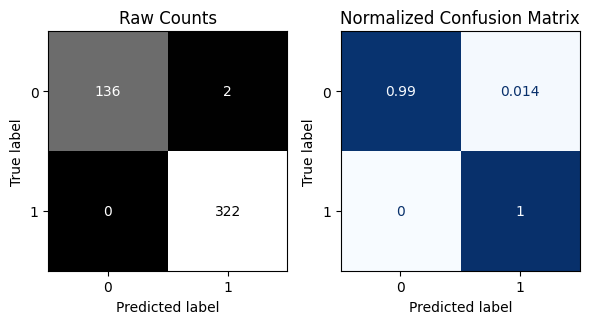


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.50      0.63        54
           1       0.78      0.95      0.86       100

    accuracy                           0.79       154
   macro avg       0.81      0.72      0.74       154
weighted avg       0.80      0.79      0.78       154



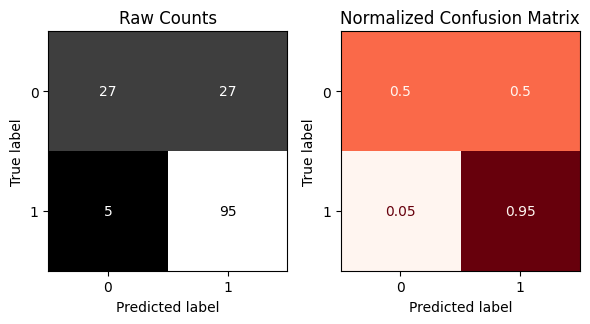

In [47]:
evaluate_classification(lgbm_pipe, X_train, y_train, X_test, y_test)

### XGBoost

In [48]:
# Instantiate and fit gradient boosting classifier
xgb = XGBClassifier(n_estimators=200, max_depth=1)

xgb_pipe = make_pipeline(preprocessor, xgb)

xgb_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount'], dtype='object')),
                                                 ('ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='const...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=1, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

----------------------------------------------------------------------
 Classification Metrics: Training Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.49      0.63       138
           1       0.82      0.98      0.89       322

    accuracy                           0.83       460
   macro avg       0.86      0.73      0.76       460
weighted avg       0.84      0.83      0.81       460



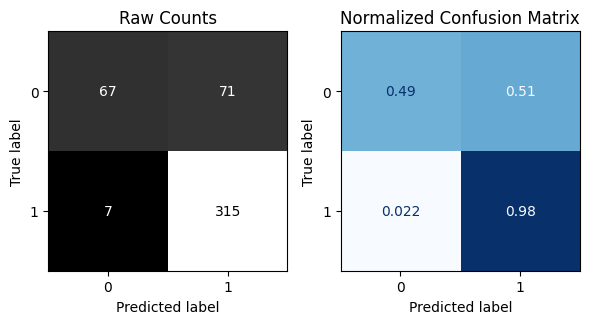


----------------------------------------------------------------------
 Classification Metrics: Test Data
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.92      0.43      0.58        54
           1       0.76      0.98      0.86       100

    accuracy                           0.79       154
   macro avg       0.84      0.70      0.72       154
weighted avg       0.82      0.79      0.76       154



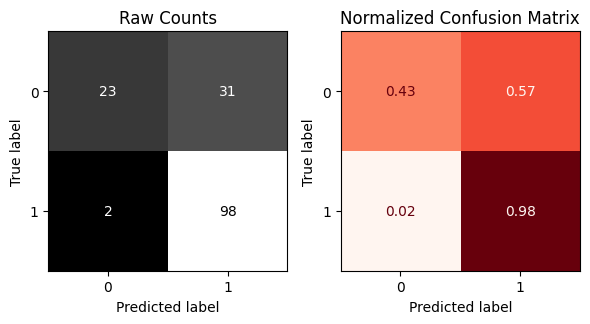

In [49]:
evaluate_classification(xgb_pipe, X_train, y_train, X_test, y_test)